In [46]:
import pandas as pd
import numpy as np

In [47]:
data = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [48]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [56]:
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]

(-1.1249488483360774,
 1.111734386335751,
 -1.1104291944240205,
 1.1004966283059057)

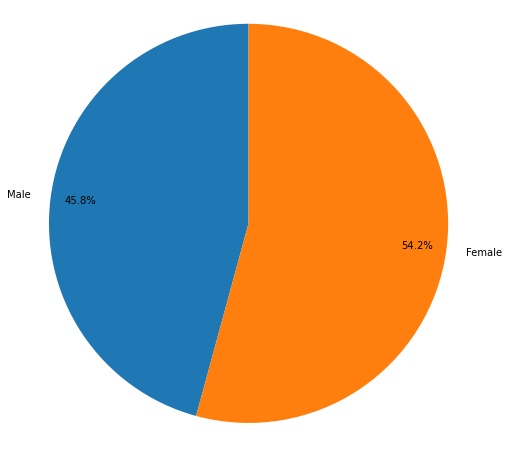

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['Male','Female']
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
p=plt.gcf()
plt.axis('equal')

C:\Users\Sathvik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


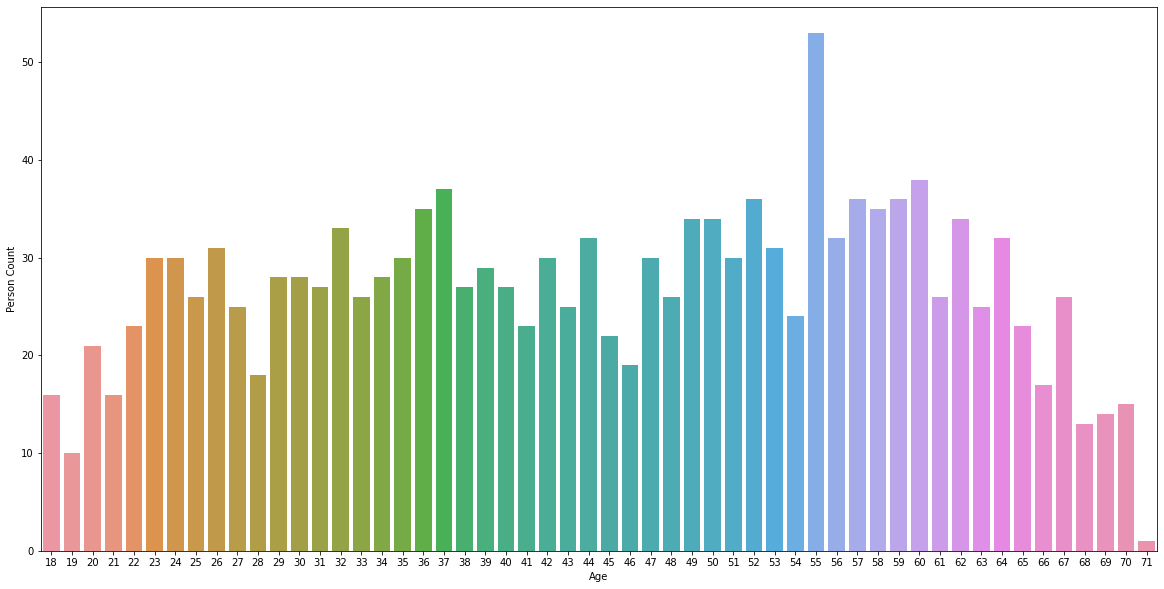

In [61]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

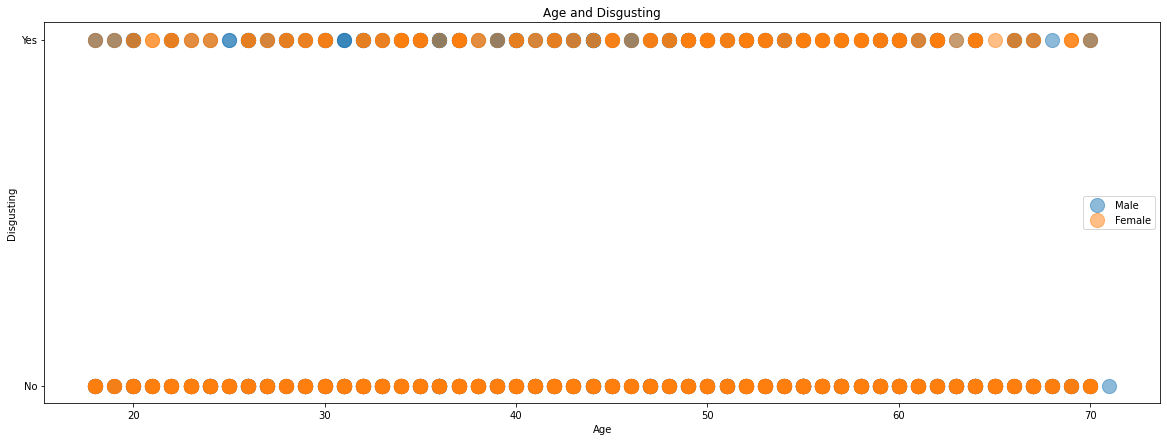

In [62]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='disgusting', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Disgusting")
plt.title("Age and Disgusting")
plt.show()

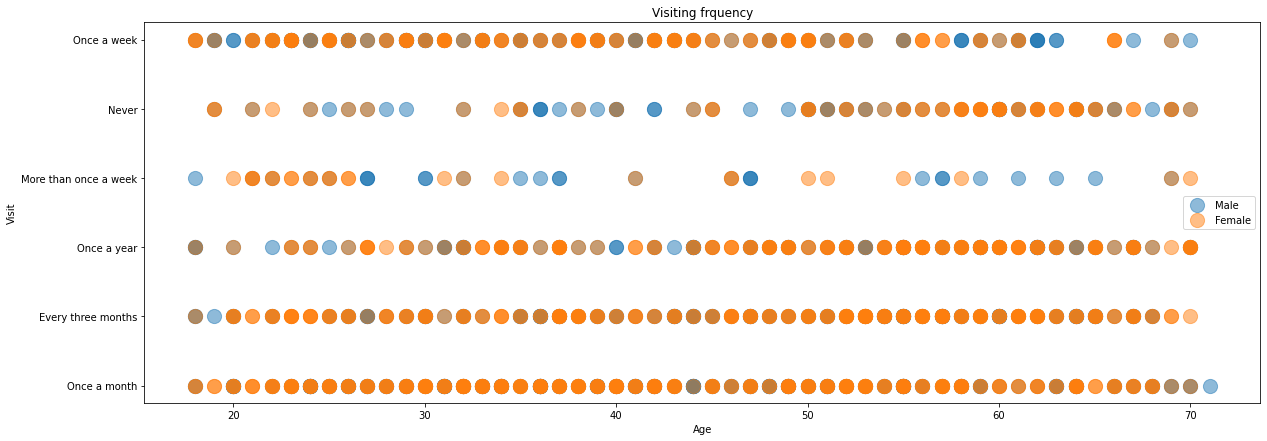

In [64]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='VisitFrequency', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Visit")
plt.title("Visiting frquency")
plt.show()

In [72]:
categorical = data.drop(['Gender','VisitFrequency','Like','Age'],axis=1)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in categorical.columns:
    categorical[i] = label_encoder.fit_transform(categorical[i])

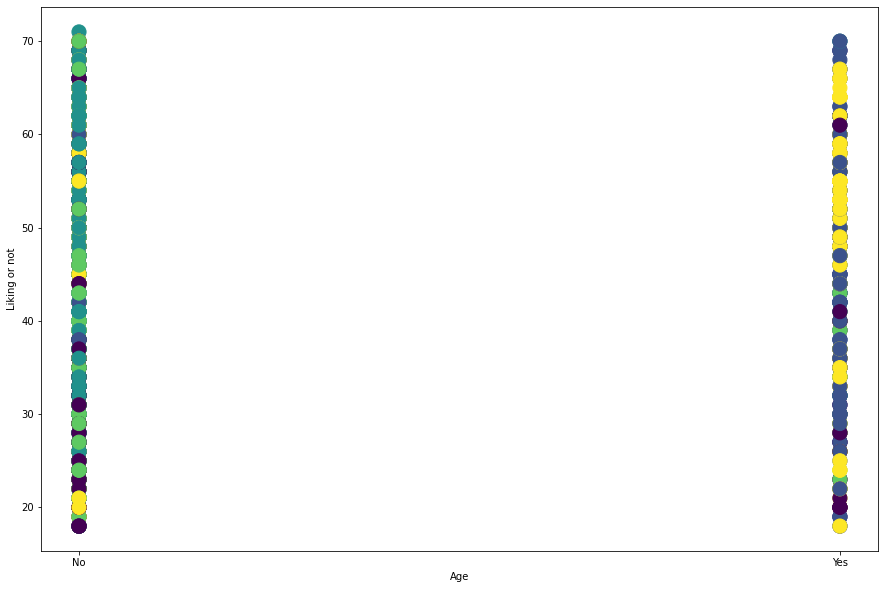

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(categorical)

plt.figure(figsize=(15,10))
plt.scatter( x = 'disgusting' ,y = 'Age' , data = data , c = data_predict , s = 200 )
plt.xlabel("Age")
plt.ylabel("Liking or not")
plt.show()

In [76]:
import scipy.cluster.hierarchy as shc

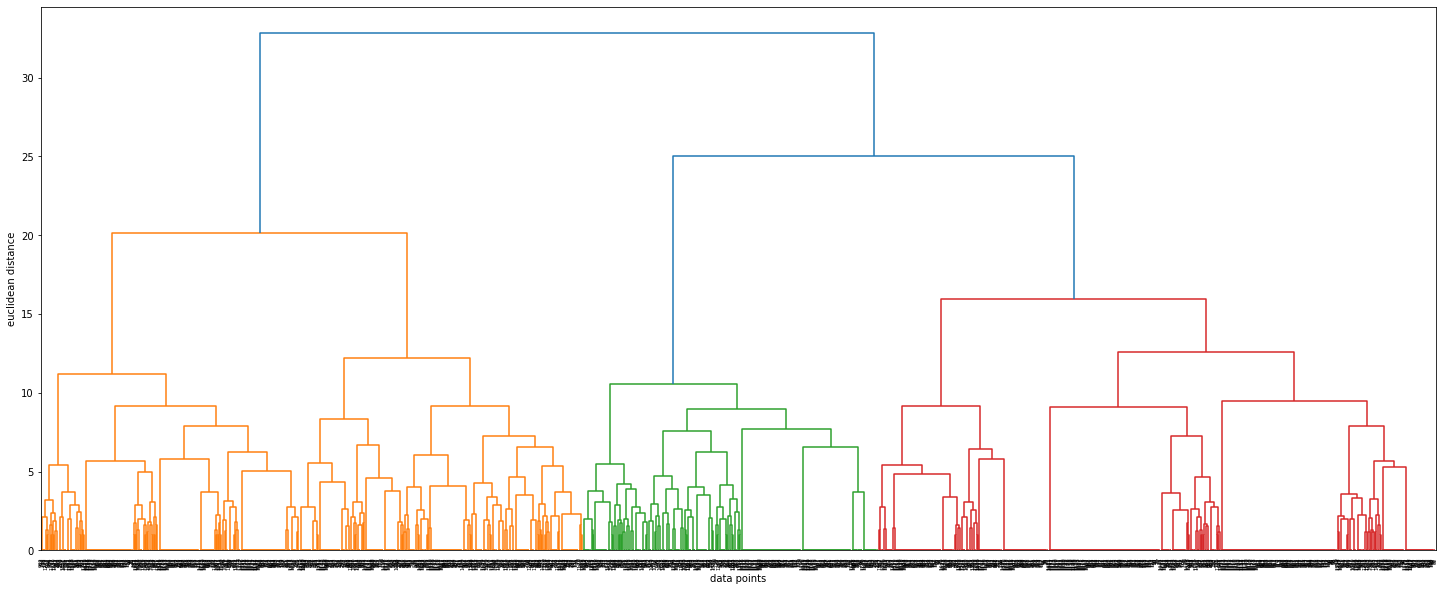

In [77]:
merg = linkage(categorical,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()